In [1]:
!python --version

Python 3.7.3


In [3]:
# Start writing your code here...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import requests

In [4]:
query_string='https://data.gov.sg/api/action/datastore_search?resource_id=42ff9cfe-abe5-4b54-beda-c88f9bb438ee&limit=500'
response = requests.get(query_string)
data = json.loads(response.content)

In [5]:
print(data)

{'help': 'https://data.gov.sg/api/3/action/help_show?name=datastore_search', 'success': True, 'result': {'resource_id': '42ff9cfe-abe5-4b54-beda-c88f9bb438ee', 'fields': [{'type': 'int4', 'id': '_id'}, {'type': 'text', 'id': 'month'}, {'type': 'text', 'id': 'town'}, {'type': 'text', 'id': 'flat_type'}, {'type': 'text', 'id': 'block'}, {'type': 'text', 'id': 'street_name'}, {'type': 'text', 'id': 'storey_range'}, {'type': 'numeric', 'id': 'floor_area_sqm'}, {'type': 'text', 'id': 'flat_model'}, {'type': 'numeric', 'id': 'lease_commence_date'}, {'type': 'text', 'id': 'remaining_lease'}, {'type': 'numeric', 'id': 'resale_price'}], 'records': [{'town': 'TOA PAYOH', 'flat_type': '4 ROOM', 'flat_model': 'Model A', 'floor_area_sqm': '85', 'street_name': 'LOR 2 TOA PAYOH', 'resale_price': '600000', 'month': '2018-06', 'remaining_lease': '81 years 08 months', 'lease_commence_date': '2001', 'storey_range': '10 TO 12', '_id': 1, 'block': '142'}, {'town': 'TOA PAYOH', 'flat_type': '4 ROOM', 'flat_

In [6]:
print(type(data))

<class 'dict'>


In [7]:
len(data['result']['records'])

500

In [11]:
hdb_price_dict_records = data['result']['records']

In [12]:
hdb_price_dict_records[0]

{'town': 'TOA PAYOH',
 'flat_type': '4 ROOM',
 'flat_model': 'Model A',
 'floor_area_sqm': '85',
 'street_name': 'LOR 2 TOA PAYOH',
 'resale_price': '600000',
 'month': '2018-06',
 'remaining_lease': '81 years 08 months',
 'lease_commence_date': '2001',
 'storey_range': '10 TO 12',
 '_id': 1,
 'block': '142'}

In [13]:
town = []
flat_type = []
flat_model = []
floor_area_sqm = []
street_name = []
resale_price = []
month = []
remaining_lease = []
lease_commence_date = []
storey_range = []
_id = []
block = []

for i in range(0, len(hdb_price_dict_records)):
    town.append(hdb_price_dict_records[i]['town'])
    flat_type.append(hdb_price_dict_records[i]['flat_type'])
    flat_model.append(hdb_price_dict_records[i]['flat_model'])
    floor_area_sqm.append(hdb_price_dict_records[i]['floor_area_sqm'])
    street_name.append(hdb_price_dict_records[i]['street_name'])
    resale_price.append(hdb_price_dict_records[i]['resale_price'])
    month.append(hdb_price_dict_records[i]['month'])
    remaining_lease.append(hdb_price_dict_records[i]['remaining_lease'])
    lease_commence_date.append(hdb_price_dict_records[i]['lease_commence_date'])
    storey_range.append(hdb_price_dict_records[i]['storey_range'])
    _id.append(hdb_price_dict_records[i]['_id'])
    block.append(hdb_price_dict_records[i]['block'])

In [14]:
df_hdb_price = pd.DataFrame({
    'town':town,
    'flat_type':flat_type,
    'flat_model':flat_model,
    'floor_area_sqm':floor_area_sqm,
    'street_name':street_name,
    'resale_price':resale_price,
    'month':month,
    'remaining_lease':remaining_lease,
    'lease_commence_date':lease_commence_date,
    'storey_range':storey_range,
    '_id':_id,
    'block':block
})

In [15]:
df_hdb_price.head()

,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,remaining_lease,lease_commence_date,storey_range,_id,block
0,TOA PAYOH,4 ROOM,Model A,85,LOR 2 TOA PAYOH,600000,2018-06,81 years 08 months,2001,10 TO 12,1,142
1,TOA PAYOH,4 ROOM,Model A,101,LOR 2 TOA PAYOH,700000,2018-06,82 years 08 months,2002,16 TO 18,2,121
2,TOA PAYOH,4 ROOM,Model A,100,LOR 2 TOA PAYOH,780000,2018-06,81 years 08 months,2001,13 TO 15,3,154
3,TOA PAYOH,4 ROOM,Model A,91,LOR 2 TOA PAYOH,642000,2018-06,86 years 07 months,2006,07 TO 09,4,145
4,TOA PAYOH,4 ROOM,Model A,105,LOR 2 TOA PAYOH,692000,2018-06,77 years 11 months,1997,10 TO 12,5,84A


In [16]:
df_hdb_price.shape

(500, 12)

In [17]:
list_of_mrt = [
    'Jurong East MRT Station',
    'Bukit Batok MRT Station',
    'Bukit Gombak MRT Station',
    'Choa Chu Kang MRT Station',
    'Yew Tee MRT Station',
    'Kranji MRT Station',
    'Marsiling MRT Station',
    'Woodlands MRT Station',
    'Admiralty MRT Station',
    'Sembawang MRT Station',
    'Canberra MRT Station',
    'Yishun MRT Station',
    'Khatib MRT Station',
    'Yio Chu Kang MRT Station',
    'Ang Mo Kio MRT Station',
    'Bishan MRT Station',
    'Braddell MRT Station',
    'Toa Payoh MRT Station',
    'Novena MRT Station',
    'Newton MRT Station',
    'Orchard MRT Station',
    'Somerset MRT Station',
    'Dhoby Ghaut MRT Station',
    'City Hall MRT Station',
    'Raffles Place MRT Station',
    'Marina Bay MRT Station',
    'Marina South Pier MRT Station',
    'Pasir Ris MRT Station',
    'Tampines MRT Station',
    'Simei MRT Station',
    'Tanah Merah MRT Station',
    'Bedok MRT Station',
    'Kembangan MRT Station',
    'Eunos MRT Station',
    'Paya Lebar MRT Station',
    'Aljunied MRT Station',
    'Kallang MRT Station',
    'Lavender MRT Station',
    'Bugis MRT Station',
    'Tanjong Pagar MRT Station',
    'Outram Park MRT Station',
    'Tiong Bahru MRT Station',
    'Redhill MRT Station',
    'Queenstown MRT Station',
    'Commonwealth MRT Station',
    'Buona Vista MRT Station',
    'Dover MRT Station',
    'Clementi MRT Station',
    'Chinese Garden MRT Station',
    'Lakeside MRT Station',
    'Boon Lay MRT Station',
    'Pioneer MRT Station',
    'Joo Koon MRT Station',
    'Gul Circle MRT Station',
    'Tuas Crescent MRT Station',
    'Tuas West Road MRT Station',
    'Tuas Link MRT Station',
    'Expo MRT Station',
    'Changi Airport MRT Station',
    'HarbourFront MRT Station',
    'Chinatown MRT Station',
    'Clarke Quay MRT Station',
    'Little India MRT Station',
    'Farrer Park MRT Station',
    'Boon Keng MRT Station',
    'Potong Pasir MRT Station',
    'Woodleigh MRT Station',
    'Serangoon MRT Station',
    'Kovan MRT Station',
    'Hougang MRT Station',
    'Buangkok MRT Station',
    'Sengkang MRT Station',
    'Punggol MRT Station',
    'Bras Basah MRT Station',
    'Esplanade MRT Station',
    'Promenade MRT Station',
    'Nicoll Highway MRT Station',
    'Stadium MRT Station',
    'Mountbatten MRT Station',
    'Dakota MRT Station',
    'MacPherson MRT Station',
    'Tai Seng MRT Station',
    'Bartley MRT Station',
    'Lorong Chuan MRT Station',
    'Marymount MRT Station',
    'Caldecott MRT Station',
    'Botanic Gardens MRT Station',
    'Farrer Road MRT Station',
    'Holland Village MRT Station',
    'one-north MRT Station',
    'Kent Ridge MRT Station',
    'Haw Par Villa MRT Station',
    'Pasir Panjang MRT Station',
    'Labrador Park MRT Station',
    'Telok Blangah MRT Station',
    'Bayfront MRT Station',
    'Bukit Panjang MRT Station',
    'Cashew MRT Station',
    'Hillview MRT Station',
    'Beauty World MRT Station',
    'King Albert Park MRT Station',
    'Sixth Avenue MRT Station',
    'Tan Kah Kee MRT Station',
    'Stevens MRT Station',
    'Rochor MRT Station',
    'Downtown MRT Station',
    'Telok Ayer MRT Station',
    'Fort Canning MRT Station',
    'Bencoolen MRT Station',
    'Jalan Besar MRT Station',
    'Bendemeer MRT Station',
    'Geylang Bahru MRT Station',
    'Mattar MRT Station',
    'Ubi MRT Station',
    'Kaki Bukit MRT Station',
    'Bedok North MRT Station',
    'Bedok Reservoir MRT Station',
    'Tampines West MRT Station',
    'Tampines East MRT Station',
    'Upper Changi MRT Station'
]

In [18]:
list_of_shopping_mall = [
    '100 AM',
    '313@Somerset',
    'Aperia',
    'Balestier Hill Shopping Centre',
    'Bugis Cube',
    'Bugis Junction',
    'Bugis+',
    'Capitol Piazza',
    'Cathay Cineleisure Orchard',
    'City Gate',
    'City Square Mall',
    'CityLink Mall',
    'Clarke Quay Central',
    'Duo',
    'Far East Plaza',
    'Funan',
    'Great World City',
    'HDB Hub',
    'Holland Village Shopping Mall',
    'ION Orchard',
    'Junction 8',
    'Knightsbridge[1]',
    'Liang Court',
    'Liat Towers',
    'Lucky Plaza',
    'Marina Bay Financial Centre Tower 3',
    'Marina Bay Link Mall',
    'Marina Bay Sands',
    'Marina One',
    'Marina Square',
    'Midpoint Orchard',
    'Millenia Walk',
    'Mustafa Shopping Centre',
    'Ngee Ann City',
    'Orchard Central',
    'Orchard Gateway',
    'Orchard Plaza',
    'Orchard Shopping Centre',
    'Palais Renaissance',
    'Peoples Park Centre',
    'Peoples Park Complex',
    'Plaza Singapura',
    'PoMo',
    'Raffles City',
    'Scotts Square',
    'Serangoon Plaza',
    'Shaw House and Centre',
    'Sim Lim Square',
    'Singapore Shopping Centre',
    'Square 2',
    'Suntec City',
    'Tanglin Mall',
    'Tangs',
    'Tanjong Pagar Centre',
    'Tekka Centre',
    'The Centrepoint',
    'The Paragon',
    'The Poiz [2]',
    'The Shoppes at Marina Bay Sands',
    'The South Beach',
    'Thomson Plaza',
    'United Square, The Kids Learning Mall',
    'Velocity',
    'Wheelock Place',
    'Wisma Atria',
    'Zhongshan Mall',
    '112 Katong',
    'Bedok Mall',
    'Bedok Point',
    'Century Square',
    'Changi Airport',
    'Changi City Point',
    'City Plaza',
    'Djitsun Mall Bedok',
    'Downtown East',
    'East Village',
    'Eastpoint Mall',
    'Elias Mall',
    'Kallang Wave Mall',
    'Katong Square',
    'Katong V',
    'KINEX (formerly One KM Mall)',
    'Leisure Park Kallang',
    'Loyang Point',
    'Our Tampines Hub',
    'Parkway Parade',
    'Paya Lebar Square',
    'PLQ Mall',
    'Singapore Post Centre',
    'Tampines 1',
    'Tampines Mall',
    'The Flow',
    'White Sands',
    '888 Plaza',
    'Admiralty Place',
    'AMK Hub',
    'Beauty World Centre',
    'Beauty World Plaza',
    'Broadway Plaza',
    'Buangkok Square',
    'Bukit Panjang Plaza',
    'Bukit Timah Plaza',
    'Causeway Point',
    'Compass One',
    'Djitsun Mall',
    'Fajar Shopping Centre',
    'Greenridge Shopping Centre',
    'Greenwich V',
    'Heartland Mall',
    'Hillion Mall',
    'HillV2',
    'Hougang 1',
    'Hougang Green Shopping Mall',
    'Hougang Mall',
    'Jubilee Square',
    'Junction 10',
    'Junction 9',
    'Keat Hong Shopping Centre',
    'KKH The Retail Mall',
    'Limbang Shopping Centre',
    'Lot One',
    'Marsiling Mall',
    'myVillage @ Serangoon',
    'NEX',
    'North East',
    'North West',
    'Northpoint City',
    'Oasis Terraces',
    'Punggol Plaza',
    'Rail Mall',
    'Rivervale Mall',
    'Rivervale Plaza',
    'Sembawang Shopping Centre',
    'Sun Plaza',
    'Sunshine Place',
    'Teck Whye Shopping Centre',
    'The Midtown',
    'The Seletar Mall',
    'Upper Serangoon Shopping Centre',
    'Waterway Point',
    'West Mall',
    'Wisteria Mall',
    'Woodlands Mart',
    'Yew Tee Point',
    'Yew Tee Shopping Centre',
    'Yew Tee Square',
    'Alexandra Retail Centre',
    'HarbourFront Centre',
    'VivoCity',
    '321 Clementi',
    'Alexandra Central',
    'Anchorpoint',
    'Big Box',
    'Boon Lay Shopping Centre',
    'Fairprice Hub',
    'Gek Poh Shopping Centre',
    'Grantral Mall',
    'IMM',
    'JCube',
    'Jem',
    'Jurong Point',
    'OD Mall',
    'Pioneer Mall',
    'Queensway Shopping Centre',
    'Rochester Mall',
    'Taman Jurong Shopping Centre',
    'The Clementi Mall',
    'The Star Vista',
    'Tiong Bahru Plaza',
    'West Coast Plaza',
    'Westgate Mall',
]


In [19]:
mrt_lat = []
mrt_long = []

for i in range(0, len(list_of_mrt)):
    query_address = list_of_mrt[i]
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    response = requests.get(query_string)

    data_mrt = json.loads(response.content)
    if data_mrt['found'] != 0:
        mrt_lat.append(data_mrt["results"][0]["LATITUDE"])
        mrt_long.append(data_mrt["results"][0]["LONGITUDE"])

        print (str(query_address)+",Lat: "+data_mrt['results'][0]['LATITUDE'] +" Long: "+data_mrt['results'][0]['LONGITUDE'])
    
    else:
        mrt_lat.append('Not Found')
        mrt_long.append('Not Found')
        print("No Result Found")


Jurong East MRT Station,Lat: 1.33253016 Long: 103.7426431
Bukit Batok MRT Station,Lat: 1.349512469 Long: 103.7497692
Bukit Gombak MRT Station,Lat: 1.35906994 Long: 103.7520673
Choa Chu Kang MRT Station,Lat: 1.385426201 Long: 103.744556
Yew Tee MRT Station,Lat: 1.3975350180000001 Long: 103.7474051
Kranji MRT Station,Lat: 1.4251259490000001 Long: 103.7617547
Marsiling MRT Station,Lat: 1.432807925 Long: 103.77420670000001
Woodlands MRT Station,Lat: 1.436596431 Long: 103.7858442
Admiralty MRT Station,Lat: 1.4401624819999999 Long: 103.8005272
Sembawang MRT Station,Lat: 1.4487733980000002 Long: 103.8197832
Canberra MRT Station,Lat: 1.443076641 Long: 103.82970259999999
Yishun MRT Station,Lat: 1.42964614 Long: 103.8348671
Khatib MRT Station,Lat: 1.4171305459999999 Long: 103.83269179999999
Yio Chu Kang MRT Station,Lat: 1.381960215 Long: 103.8446515
Ang Mo Kio MRT Station,Lat: 1.369428557 Long: 103.84945520000001
Bishan MRT Station,Lat: 1.3510188980000002 Long: 103.85005720000001
Braddell MRT St

In [20]:
mrt_location = pd.DataFrame({
    'MRT':list_of_mrt,
    'latitude':mrt_lat,
    'longitude':mrt_long
})

In [21]:
mrt_location.head()

,MRT,latitude,longitude
0,Jurong East MRT Station,1.33253016,103.7426431
1,Bukit Batok MRT Station,1.349512469,103.7497692
2,Bukit Gombak MRT Station,1.35906994,103.7520673
3,Choa Chu Kang MRT Station,1.385426201,103.744556
4,Yew Tee MRT Station,1.3975350180000001,103.7474051


In [22]:
mrt_location.shape

(120, 3)

In [34]:
mall_name = []
mall_roadname = []
mall_lat = []
mall_long = []

for i in range(0, len(list_of_shopping_mall)):
    query_address = list_of_shopping_mall[i]
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'
    resp = requests.get(query_string)
    data_mall=json.loads(resp.content)
    
    if data_mall['found'] != 0:
        mall_name.append(query_address)
        mall_roadname.append(data_mall["results"][0]["ROAD_NAME"])
        mall_lat.append(data_mall["results"][0]["LATITUDE"])
        mall_long.append(data_mall["results"][0]["LONGITUDE"])

        print (str(query_address)+" ,Lat: "+data_mall['results'][0]['LATITUDE'] +" Long: "+data_mall['results'][0]['LONGITUDE'])

    else:
        print ("No Results Found")

100 AM ,Lat: 1.2745882179999999 Long: 103.84347070000001
313@Somerset ,Lat: 1.301385102 Long: 103.8376844
Aperia ,Lat: 1.30974242 Long: 103.8641016
Balestier Hill Shopping Centre ,Lat: 1.326124169 Long: 103.8437095
Bugis Cube ,Lat: 1.298195005 Long: 103.85565550000001
Bugis Junction ,Lat: 1.300117893 Long: 103.8561916
Bugis+ ,Lat: 1.301204089 Long: 103.8559241
Capitol Piazza ,Lat: 1.293063359 Long: 103.85129350000001
Cathay Cineleisure Orchard ,Lat: 1.301497434 Long: 103.8364448
City Gate ,Lat: 1.302347543 Long: 103.86225999999999
City Square Mall ,Lat: 1.31147745 Long: 103.8567808
CityLink Mall ,Lat: 1.292378607 Long: 103.854663
No Results Found
Duo ,Lat: 1.299216621 Long: 103.8579968
Far East Plaza ,Lat: 1.3073111259999999 Long: 103.83394
Funan ,Lat: 1.2912440059999999 Long: 103.8499848
Great World City ,Lat: 1.293154929 Long: 103.831928
HDB Hub ,Lat: 1.33218812 Long: 103.8470778
No Results Found
ION Orchard ,Lat: 1.3040425340000001 Long: 103.83188829999999
Junction 8 ,Lat: 1.3502394

In [35]:
mall_location = pd.DataFrame({
    'Mall': mall_name,
    'RoadName': mall_roadname,
    'Latitude': mall_lat,
    'Longitude': mall_long
})

In [36]:
mall_location.head()

,Mall,RoadName,Latitude,Longitude
0,100 AM,TRAS STREET,1.2745882179999999,103.84347070000001
1,313@Somerset,ORCHARD ROAD,1.301385102,103.8376844
2,Aperia,KALLANG AVENUE,1.30974242,103.8641016
3,Balestier Hill Shopping Centre,BALESTIER ROAD,1.326124169,103.8437095
4,Bugis Cube,NORTH BRIDGE ROAD,1.298195005,103.85565550000001


In [37]:
mall_location.shape

(156, 4)

In [23]:
df_hdb_price['address'] = df_hdb_price['block'] + " " + df_hdb_price['street_name']
df_dedup = df_hdb_price.drop_duplicates(subset='address', keep='first')

In [24]:
len(df_dedup)

441

In [25]:
address_list = df_dedup['address'].tolist()
len(address_list)

441

In [26]:
latitude = []
longitude = []
blk_no = []
road_name = []
postal_code = []
address = []
count = 0

for row in range(len(address_list)):
    query_address = address_list[row]
    query_string = 'https://developers.onemap.sg/commonapi/search?searchVal='+str(query_address)+'&returnGeom=Y&getAddrDetails=Y'

    resp = requests.get(query_string)
    data_geo_location = json.loads(resp.content)

    if data_geo_location['found'] != 0:
        latitude.append(data_geo_location['results'][0]['LATITUDE'])
        longitude.append(data_geo_location['results'][0]['LONGITUDE'])
        blk_no.append(data_geo_location['results'][0]['BLK_NO'])
        road_name.append(data_geo_location['results'][0]['ROAD_NAME'])
        postal_code.append(data_geo_location['results'][0]['POSTAL'])
        address.append(query_address)
        
        print(str(query_address) + " ,Lat: " + data_geo_location['results'][0]['LATITUDE'] + " Long: " + data_geo_location['results'][0]['LONGITUDE'])
    else:
        print("No Results Found")

142 LOR 2 TOA PAYOH ,Lat: 1.33583775 Long: 103.845163
121 LOR 2 TOA PAYOH ,Lat: 1.339162623 Long: 103.8462435
154 LOR 2 TOA PAYOH ,Lat: 1.33328783 Long: 103.84616559999999
145 LOR 2 TOA PAYOH ,Lat: 1.335210354 Long: 103.84616290000001
84A LOR 2 TOA PAYOH ,Lat: 1.335355004 Long: 103.84702990000001
60 LOR 4 TOA PAYOH ,Lat: 1.336486552 Long: 103.8511223
193 LOR 4 TOA PAYOH ,Lat: 1.331590056 Long: 103.85129509999999
14B LOR 7 TOA PAYOH ,Lat: 1.335738874 Long: 103.8584084
10B LOR 7 TOA PAYOH ,Lat: 1.337161364 Long: 103.8583536
220 LOR 8 TOA PAYOH ,Lat: 1.3426167340000001 Long: 103.85645490000002
226 LOR 8 TOA PAYOH ,Lat: 1.339515666 Long: 103.857051
118 POTONG PASIR AVE 1 ,Lat: 1.335481474 Long: 103.86265379999999
122 POTONG PASIR AVE 1 ,Lat: 1.33493172 Long: 103.866125
113 POTONG PASIR AVE 1 ,Lat: 1.336055939 Long: 103.8635995
145 POTONG PASIR AVE 2 ,Lat: 1.3323731779999999 Long: 103.8661652
79B TOA PAYOH CTRL ,Lat: 1.334640783 Long: 103.84799029999999
79C TOA PAYOH CTRL ,Lat: 1.3346605790

In [27]:
df_coordinates = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'blk_no': blk_no,
    'road_name': road_name,
    'postal_code': postal_code,
    'address': address
})

In [28]:
len(df_coordinates)

441

In [29]:
df_coordinates.shape

(441, 6)

In [38]:
list_of_lat = df_coordinates['latitude']
list_of_long = df_coordinates['longitude']
mrt_lat = mrt_location['latitude']
mrt_long = mrt_location['longitude']
mall_lat = mall_location['Latitude']
mall_long = mall_location['Longitude']

list_of_coordinates = []

for lat, long1 in zip(list_of_lat, list_of_long):
    list_of_coordinates.append((lat,long1))

list_of_mrt_coordinates = []

for lat, long1 in zip(mrt_lat, mrt_long):
    list_of_mrt_coordinates.append((lat, long1))

list_of_mall_coordinates = []

for lat, long in zip(mall_lat, mall_long):
    list_of_mall_coordinates.append((lat, long))

In [39]:
print(len(list_of_coordinates))
print(len(list_of_mrt_coordinates))
print(len(list_of_mall_coordinates))

441
120
156


In [41]:
!pip install geopy

     |████████████████████████████████| 112kB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


In [42]:
from geopy.distance import geodesic

list_of_dist_mrt = []
min_dist_mrt = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mrt_coordinates)):
        list_of_dist_mrt.append(geodesic(origin,list_of_mrt_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mrt))
    min_dist_mrt.append(shortest)
    list_of_dist_mrt.clear()

In [43]:
list_of_dist_mall = []
min_dist_mall = []

for origin in list_of_coordinates:
    for destination in range(0, len(list_of_mall_coordinates)):
        list_of_dist_mall.append(geodesic(origin,list_of_mall_coordinates[destination]).meters)
    shortest = (min(list_of_dist_mall))
    print(shortest)
    min_dist_mall.append(shortest)
    list_of_dist_mall.clear()

456.36495659548996
776.7739573655746
158.40646585549916
349.3500357854558
350.2183829455852
654.6053268064405
473.97776422222836
1320.6880537185452
1370.0826092765237
1224.1763595622674
1374.1896512174624
1771.284318792856
1854.24013385005
1859.760277415107
1709.9519429149134
289.592418063518
320.3282244184919
264.7247205054273
988.2070854099827
971.0529567030712
478.777605895285
613.939161943774
564.288456917213
669.1811787343023
1114.4146752208774
1266.8000998046862
1529.6305256938704
1743.8668605748646
756.138137520985
1669.9735570167943
787.5359347137704
1103.2384513393442
865.5220128022587
743.8356760628028
767.5635334103732
104.79936054224004
68.83040747712481
676.1074061420966
649.1483642709356
365.74921674358905
589.9120682431496
437.0270602757785
911.8778785808511
856.7748527140513
875.8311843437627
865.5220128022587
490.86845873042984
568.271868331619
864.9083186884491
836.4465745806845
360.85430400372286
490.64784225733405
277.6850115693278
260.7348406812683
343.546579313333

In [44]:
cbd_dist = []

for origin in list_of_coordinates:
    cbd_dist.append(geodesic(origin,(1.2830, 103.8513)).meters)

In [45]:
df_coordinates['min_dist_mrt'] = min_dist_mrt
df_coordinates['min_dist_mall'] = min_dist_mall
df_coordinates['cbd_dist'] = cbd_dist

In [46]:
df_coordinates.head()

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_mall,cbd_dist
0,1.33583775,103.845163,142,LORONG 2 TOA PAYOH,310142,142 LOR 2 TOA PAYOH,473.605276,456.364957,5882.311865
1,1.339162623,103.8462435,121,LORONG 2 TOA PAYOH,310121,121 LOR 2 TOA PAYOH,118.806105,776.773957,6235.618520
2,1.33328783,103.84616559999999,154,LORONG 2 TOA PAYOH,310154,154 LOR 2 TOA PAYOH,189.749597,158.406466,5589.851819
3,1.335210354,103.84616290000001,145,LORONG 2 TOA PAYOH,310145,145 LOR 2 TOA PAYOH,357.579124,349.350036,5801.391347
4,1.335355004,103.84702990000001,84A,LORONG 2 TOA PAYOH,311084,84A LOR 2 TOA PAYOH,343.185024,350.218383,5808.619375


In [47]:
df_coordinates.head()

,latitude,longitude,blk_no,road_name,postal_code,address,min_dist_mrt,min_dist_mall,cbd_dist
0,1.33583775,103.845163,142,LORONG 2 TOA PAYOH,310142,142 LOR 2 TOA PAYOH,473.605276,456.364957,5882.311865
1,1.339162623,103.8462435,121,LORONG 2 TOA PAYOH,310121,121 LOR 2 TOA PAYOH,118.806105,776.773957,6235.618520
2,1.33328783,103.84616559999999,154,LORONG 2 TOA PAYOH,310154,154 LOR 2 TOA PAYOH,189.749597,158.406466,5589.851819
3,1.335210354,103.84616290000001,145,LORONG 2 TOA PAYOH,310145,145 LOR 2 TOA PAYOH,357.579124,349.350036,5801.391347
4,1.335355004,103.84702990000001,84A,LORONG 2 TOA PAYOH,311084,84A LOR 2 TOA PAYOH,343.185024,350.218383,5808.619375


In [48]:
combined = df_coordinates.merge(df_hdb_price, on="address", how='outer')

In [50]:
combined['resale_price'] = combined['resale_price'].astype('float')
combined['floor_area_sqm'] = combined['floor_area_sqm'].astype('float')
combined['lease_commence_date'] = combined['lease_commence_date'].astype('int64')
combined['lease_remain_years'] = 2020 - combined['lease_commence_date']
combined.columns
combined.dropna(inplace=True)
combined['price_per_sqm'] = combined['resale_price'].div(combined['floor_area_sqm'])

In [51]:
combined.describe()

,min_dist_mrt,min_dist_mall,cbd_dist,floor_area_sqm,resale_price,lease_commence_date,_id,lease_remain_years,price_per_sqm
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,702.713867,732.875625,13320.942088,94.684000,4.094591e+05,1990.118000,250.554000,29.882000,4348.975056
std,324.850505,404.059605,4641.039645,25.072563,1.554825e+05,10.973099,144.574973,10.973099,1127.885232
min,82.133953,52.042132,2130.538481,34.000000,2.180000e+05,1969.000000,1.000000,5.000000,2613.636364
25%,467.167622,455.756516,9604.512476,73.000000,3.020000e+05,1982.000000,125.750000,22.000000,3544.507576
50%,669.312798,674.376697,14349.647496,92.000000,3.622500e+05,1987.000000,250.500000,33.000000,4133.974359
75%,892.258038,929.190765,17717.337112,110.250000,4.420000e+05,1998.000000,375.250000,38.000000,4670.880948
max,1697.505233,2268.908110,20117.449447,192.000000,1.065000e+06,2015.000000,505.000000,51.000000,9342.105263


In [52]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 23 columns):
latitude               500 non-null object
longitude              500 non-null object
blk_no                 500 non-null object
road_name              500 non-null object
postal_code            500 non-null object
address                500 non-null object
min_dist_mrt           500 non-null float64
min_dist_mall          500 non-null float64
cbd_dist               500 non-null float64
town                   500 non-null object
flat_type              500 non-null object
flat_model             500 non-null object
floor_area_sqm         500 non-null float64
street_name            500 non-null object
resale_price           500 non-null float64
month                  500 non-null object
remaining_lease        500 non-null object
lease_commence_date    500 non-null int64
storey_range           500 non-null object
_id                    500 non-null int64
block                  500 non-n

In [62]:
combined.isnull().sum()

latitude               0
longitude              0
blk_no                 0
road_name              0
postal_code            0
address                0
min_dist_mrt           0
min_dist_mall          0
cbd_dist               0
town                   0
flat_type              0
flat_model             0
floor_area_sqm         0
street_name            0
resale_price           0
month                  0
remaining_lease        0
lease_commence_date    0
storey_range           0
_id                    0
block                  0
lease_remain_years     0
price_per_sqm          0
dtype: int64

## Visualizations

In [56]:
!pip install seaborn

     |████████████████████████████████| 225kB 3.4MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


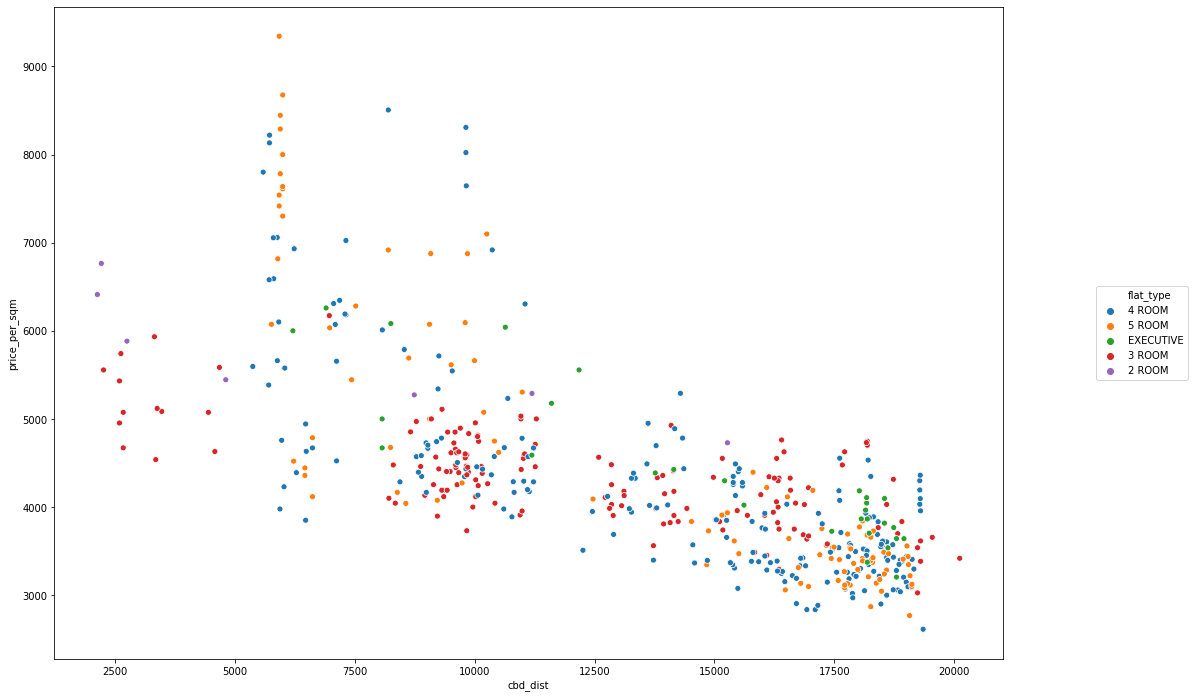

In [57]:
import seaborn as sns
fig, ax1 = plt.subplots(1,1, figsize=(20,12))
g = sns.scatterplot(x=combined['cbd_dist'], y=combined['price_per_sqm'], hue=combined['flat_type'], ax=ax1)

box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 0.85, box.height])
g.legend(loc='center right', bbox_to_anchor=(1.2,0.5), ncol=1)

plt.show()

In [64]:
df_numerical_cols = combined[['min_dist_mrt', 'min_dist_mall', 'cbd_dist','floor_area_sqm', 'lease_remain_years', 'resale_price', 'price_per_sqm']]

print(df_numerical_cols.describe().round(0))

df_numerical_cols.dropna(inplace=True)

print(df_numerical_cols.isna().sum())

       min_dist_mrt  min_dist_mall  cbd_dist  floor_area_sqm  \
count         500.0          500.0     500.0           500.0   
mean          703.0          733.0   13321.0            95.0   
std           325.0          404.0    4641.0            25.0   
min            82.0           52.0    2131.0            34.0   
25%           467.0          456.0    9605.0            73.0   
50%           669.0          674.0   14350.0            92.0   
75%           892.0          929.0   17717.0           110.0   
max          1698.0         2269.0   20117.0           192.0   

       lease_remain_years  resale_price  price_per_sqm  
count               500.0         500.0          500.0  
mean                 30.0      409459.0         4349.0  
std                  11.0      155482.0         1128.0  
min                   5.0      218000.0         2614.0  
25%                  22.0      302000.0         3545.0  
50%                  33.0      362250.0         4134.0  
75%                  38.

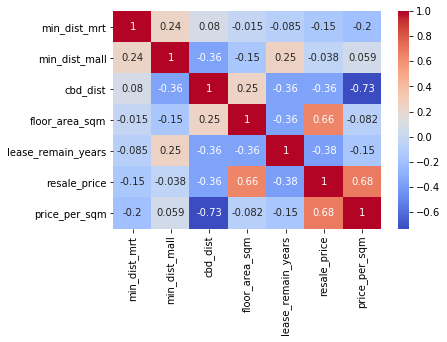

In [66]:
corrMatrix = df_numerical_cols.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix.columns,
        yticklabels=corrMatrix.columns,
        cmap='coolwarm',
        annot=True)

## Linear Regression

In [67]:
categorical_features = ['town', 'flat_type', 'storey_range']
numerical_features = ['min_dist_mrt', 'min_dist_mall', 'cbd_dist','floor_area_sqm', 'lease_remain_years', 'resale_price', 'price_per_sqm']
target_variable = ['resale_price']

In [68]:
df_regression = combined[['town', 'flat_type', 'storey_range', 'min_dist_mrt', 'min_dist_mall', 'cbd_dist','floor_area_sqm', 'lease_remain_years', 'resale_price', 'price_per_sqm']]

In [70]:
df_regression['flat_type'].value_counts()

4 ROOM       210
3 ROOM       151
5 ROOM       103
EXECUTIVE     29
2 ROOM         7
Name: flat_type, dtype: int64

In [71]:
flat_type_map = {
    '2 ROOM': 2,
    '3 ROOM': 3,
    '5 ROOM': 5,
    '4 ROOM': 4,
    'EXECUTIVE': 6
}

df_regression['flat_type_mapped'] = df_regression['flat_type'].map(lambda x: flat_type_map[x])
df_regression.head()

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,town,flat_type,storey_range,min_dist_mrt,min_dist_mall,cbd_dist,floor_area_sqm,lease_remain_years,resale_price,price_per_sqm,flat_type_mapped
0,TOA PAYOH,4 ROOM,10 TO 12,473.605276,456.364957,5882.311865,85.0,19,600000.0,7058.823529,4
1,TOA PAYOH,4 ROOM,16 TO 18,118.806105,776.773957,6235.618520,101.0,18,700000.0,6930.693069,4
2,TOA PAYOH,4 ROOM,13 TO 15,189.749597,158.406466,5589.851819,100.0,19,780000.0,7800.000000,4
3,TOA PAYOH,4 ROOM,07 TO 09,357.579124,349.350036,5801.391347,91.0,14,642000.0,7054.945055,4
4,TOA PAYOH,4 ROOM,10 TO 12,343.185024,350.218383,5808.619375,105.0,23,692000.0,6590.476190,4


In [72]:
df_regression['storey_range'].value_counts()

04 TO 06    132
10 TO 12    112
07 TO 09    110
01 TO 03     89
13 TO 15     32
16 TO 18      9
22 TO 24      6
19 TO 21      5
31 TO 33      2
34 TO 36      2
28 TO 30      1
Name: storey_range, dtype: int64

In [73]:
def split_mean(x):
    split_list = x.split(' TO ')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

In [74]:
df_regression['storey_mean'] = df_regression['storey_range'].apply(lambda x: split_mean(x))

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
df_regression.head()

,town,flat_type,storey_range,min_dist_mrt,min_dist_mall,cbd_dist,floor_area_sqm,lease_remain_years,resale_price,price_per_sqm,flat_type_mapped,storey_mean
0,TOA PAYOH,4 ROOM,10 TO 12,473.605276,456.364957,5882.311865,85.0,19,600000.0,7058.823529,4,11.0
1,TOA PAYOH,4 ROOM,16 TO 18,118.806105,776.773957,6235.618520,101.0,18,700000.0,6930.693069,4,17.0
2,TOA PAYOH,4 ROOM,13 TO 15,189.749597,158.406466,5589.851819,100.0,19,780000.0,7800.000000,4,14.0
3,TOA PAYOH,4 ROOM,07 TO 09,357.579124,349.350036,5801.391347,91.0,14,642000.0,7054.945055,4,8.0
4,TOA PAYOH,4 ROOM,10 TO 12,343.185024,350.218383,5808.619375,105.0,23,692000.0,6590.476190,4,11.0


In [76]:
df_regression = pd.get_dummies(data=df_regression, columns=['town'], drop_first=True)

In [77]:
df_regression.head()

,flat_type,storey_range,min_dist_mrt,min_dist_mall,cbd_dist,floor_area_sqm,lease_remain_years,resale_price,price_per_sqm,flat_type_mapped,storey_mean,town_BEDOK,town_BISHAN,town_BUKIT BATOK,town_BUKIT MERAH,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,4 ROOM,10 TO 12,473.605276,456.364957,5882.311865,85.0,19,600000.0,7058.823529,4,11.0,0,0,0,0,1,0,0
1,4 ROOM,16 TO 18,118.806105,776.773957,6235.618520,101.0,18,700000.0,6930.693069,4,17.0,0,0,0,0,1,0,0
2,4 ROOM,13 TO 15,189.749597,158.406466,5589.851819,100.0,19,780000.0,7800.000000,4,14.0,0,0,0,0,1,0,0
3,4 ROOM,07 TO 09,357.579124,349.350036,5801.391347,91.0,14,642000.0,7054.945055,4,8.0,0,0,0,0,1,0,0
4,4 ROOM,10 TO 12,343.185024,350.218383,5808.619375,105.0,23,692000.0,6590.476190,4,11.0,0,0,0,0,1,0,0


In [78]:
df_regression.columns

Index(['flat_type', 'storey_range', 'min_dist_mrt', 'min_dist_mall',
       'cbd_dist', 'floor_area_sqm', 'lease_remain_years', 'resale_price',
       'price_per_sqm', 'flat_type_mapped', 'storey_mean', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN'],
      dtype='object')

In [80]:
!pip install --upgrade pip

     |████████████████████████████████| 1.4MB 3.1MB/s eta 0:00:01
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


In [83]:
!pip install statsmodels

     |████████████████████████████████| 8.7 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 31.8 MB/s eta 0:00:01


In [86]:
import statsmodels.api as sm
X = df_regression[['min_dist_mrt', 'min_dist_mall',
       'cbd_dist', 'floor_area_sqm', 'lease_remain_years',
       'flat_type_mapped', 'storey_mean', 'town_BEDOK',
       'town_BISHAN', 'town_BUKIT BATOK', 'town_BUKIT MERAH', 'town_TOA PAYOH',
       'town_WOODLANDS', 'town_YISHUN']]

y = df_regression["price_per_sqm"]
X = sm.add_constant(X)

/opt/venv/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [87]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [88]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          price_per_sqm   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     205.3
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          1.88e-193
Time:                        14:33:20   Log-Likelihood:                -3739.2
No. Observations:                 500   AIC:                             7508.
Df Residuals:                     485   BIC:                             7572.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               7241.5169    324.582     22.310      0.000    6603.756    7879.278
min_dist_mrt          -0.6161      0.067     -9.168      0.000      -0.748      -0.484
min_dist_mall         -0.2945      0.058     -5.069      0.000      -0.409      -0.180
cbd_dist              -0.0125      0.030     -0.419      0.675      -0.071       0.046
floor_area_sqm        -6.2151      2.677     -2.321      0.021     -11.476      -0.954
lease_remain_years   -45.4325      2.436    -18.647      0.000     -50.220     -40.645
flat_type_mapped     125.4725     76.324      1.644      0.101     -24.493     275.438
storey_mean           44.5909      4.304     10.359      0.000      36.133      53.049
town_BEDOK          -427.7324     82.577     -5.180      0.000    -589.985    -265.479
town_BISHAN          624.4412    125.450      4.978      0.000     377.949     870.934
town_BUKIT BATOK   -1080.9438    146.467     -7.380      0.000   -1368.733    -793.155
town_BUKIT MERAH     596.2451    234.161      2.546      0.011     136.149    1056.341
town_TOA PAYOH       435.9263    142.367      3.062      0.002     156.194     715.659
town_WOODLANDS     -2091.1896    278.022     -7.522      0.000   -2637.465   -1544.914
town_YISHUN        -1459.1850    206.649     -7.061      0.000   -1865.223   -1053.147
==============================================================================
Omnibus:                       14.978   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.887
Skew:                           0.233   Prob(JB):                     1.07e-05
Kurtosis:                       3.939   Cond. No.                     3.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
df_regression['pred_error'] = predictions - df_regression["price_per_sqm"]
df_regression['pred_error'].abs().mean()

df_regression["price_per_sqm"].mean()

4348.975055672189

In [92]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df_regression["price_per_sqm"], predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(df_regression["price_per_sqm"], predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df_regression["price_per_sqm"], predictions)))

Mean Absolute Error: 327.89240714036646
Mean Squared Error: 183317.98252616904
Root Mean Squared Error: 428.1564930328268
